In [ ]:
!pip install datasets

In [ ]:
!pip install WandbLogger

In [ ]:
!pip install -U 'wandb>=0.12.10'

In [ ]:
!pip install wandb

In [ ]:
!pip install pytorch_lightning

In [ ]:
!huggingface-cli login

In [ ]:
import torch
num_gpus = torch.cuda.device_count()
print("Number of available GPUs:", num_gpus)
cuda0 = torch.device('cuda:0')

Number of available GPUs: 1


# Load Dataset

In [ ]:


#dataset = load_from_disk("Desktop/Abdul_Muqtadir/Thesis/Dataset/Dataset1")

# If the dataset is gated/private, make sure you have run huggingface-cli login
#dataset = load_dataset("AbdulMuqtadir/DocVQA_Processed_Dataset")

In [ ]:
from datasets import load_dataset, load_from_disk

#dataset = load_from_disk("E:\Abdul_Muqtadir\Thesis\Dataset\Processed_Dataset2")
dataset = load_from_disk(r"E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Processed_Dataset")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 4320
    })
    valid: Dataset({
        features: ['image', 'text'],
        num_rows: 440
    })
})

In [ ]:
import random
random_sample_train = random.randint(0, len(dataset['train']) - 1)
print(f"Random sample from 'train' is {random_sample_train}")
print(f"Ground Truth is {dataset['train'][random_sample_train]['text']}")
print(type(dataset['train'][random_sample_train]['text']))
#data_dict['train'][random_sample_train]['image'].resize((400, 700))

Random sample from 'train' is 1256
Ground Truth is {'answer': 'The price of Liquid Eyebrow Tint is 924.87.', 'question': 'What is the price of the Liquid Eyebrow Tint?'}
<class 'dict'>


# Preprocess Dataset

In [ ]:
from transformers import VisionEncoderDecoderConfig

In [ ]:

from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

processor = DonutProcessor.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\Weights\DONUT_DocVQA")
model = VisionEncoderDecoderModel.from_pretrained(r"E:\Abdul_Muqtadir\Thesis\Weights\DONUT_DocVQA")

# processor = DonutProcessor.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")
# model = VisionEncoderDecoderModel.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")

model.to(cuda0)

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.46.1",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
# from transformers import NougatProcessor, VisionEncoderDecoderModel

# processor = NougatProcessor.from_pretrained("facebook/nougat-base")
# model = VisionEncoderDecoderModel.from_pretrained("facebook/nougat-base")

# model.to(cuda0)

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    896,
    672
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "qkv_bias": true,
  "transformers_version": "4.46.1",
  "use_absolute_embeddings": false,
  "window_size": 7
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add_final_layer_norm": true

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
print(model.num_parameters())

200417400


In [ ]:
model.to(cuda0)

In [ ]:
from torchvision import models
resnet = models.resnet101(pretrained=True)

C:\Anaconda3\envs\newdonut\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Anaconda3\envs\newdonut\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\DataInsight GPU/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|███████████████████████████████████████████████████████████████████████████████| 171M/171M [00:03<00:00, 54.3MB/s]


In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig
from torchvision import models

# Load the processor and the original Donut model
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base")

In [ ]:
model.to(cuda0)

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig
from torchvision import models

# Load the processor and the original Donut model
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base")
donut = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base")

# Load the ResNet-101 model
resnet = models.resnet50(pretrained=False)

# Extract the feature extractor part of the ResNet-101 model
resnet_feature_extractor = list(resnet.children())[:-2]

# Now, the encoder of your Donut model has been replaced with ResNet-101
import torch.nn as nn
# Convert the ResNet feature extractor to a sequential model
resnet_feature_extractor = nn.Sequential(*resnet_feature_extractor)

# Replace the encoder of the Donut model with the ResNet feature extractor
donut.encoder = resnet_feature_extractor




Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Assuming `donut` is your model
total_params = count_parameters(model)
print(f"Total trainable parameters in the model: {total_params}")


Total trainable parameters in the model: 201852024


In [ ]:
total_params = count_parameters(model)
print(f"Total trainable parameters in the model: {total_params}")

Total trainable parameters in the model: 201852024


In [ ]:
parameters_parent = 201852024
parameters_student = 151179328

reduction_percentage = ((parameters_parent - parameters_student) / parameters_parent) * 100

print(f"Reduction in parameters: {reduction_percentage:.2f}%")


Reduction in parameters: 25.10%


In [ ]:
processor.attributes

['image_processor', 'tokenizer']

In [ ]:
max_length = 128
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
#config = VisionEncoderDecoderConfig.from_pretrained("naver-clova-ix/donut-base")
config = model.config
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length

In [ ]:
from typing import List

def add_tokens(list_of_tokens: List[str]):
    """
    Add tokens to tokenizer and resize the token embeddings
    """
    newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
    if newly_added_num > 0:
        model.decoder.resize_token_embeddings(len(processor.tokenizer))

In [ ]:
additional_tokens = ["<yes>", "<no/>"]

add_tokens(additional_tokens)

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


In [ ]:
import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

added_tokens = []


class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row consists of an image path (png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor (vectorized image) and input_ids (tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        print("path name:", dataset_name_or_path)
        print("split:", self.split)

        # Load dataset from disk
        data = load_from_disk(dataset_name_or_path)
        self.dataset = data[self.split]
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = sample["text"]
            ground_truth = {'question': ground_truth['question'], 'answer': ground_truth['answer']}


            gt_jsons = [ground_truth]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        print("tokens: ", [self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)

    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True, is_question: bool = True, is_end: bool = False):
        """
        Convert an ordered JSON object into a token sequence.
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        if is_question:
                            self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                        else:
                            if not self.token_exists(fr"<s_{k}>"):
                                self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key, is_question)
                        + fr"</s_{k}>"
                    )
                if is_question and is_end:
                    output += " -100"  # Add -100 after </s_question>
                return output
        elif type(obj) == list:
            return " -100 ".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key, is_question, i == len(obj)-1) for i, item in enumerate(obj)]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in added_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj

    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add special tokens to tokenizer and resize the token embeddings of the decoder.
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))
            added_tokens.extend(list_of_tokens)

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels.
        Convert gt data into input_ids (tokenized string).
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token).
        """
        sample = self.dataset[idx]

        # input_tensor
        pixel_values = processor(sample["image"].convert("RGB"), padding=True, return_tensors="pt").pixel_values
        input_tensor = pixel_values.squeeze()

        # input_ids
        processed_parse = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            processed_parse,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        if self.split == "train":
            labels = input_ids.clone()
            labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # Mask pad tokens
            labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # Mask prompt tokens

            # Identify <s_answer> and </s_answer> token positions
            start_token_id = processor.tokenizer.convert_tokens_to_ids("<s_answer>")
            end_token_id = processor.tokenizer.convert_tokens_to_ids("</s_answer>")
            start_indices = torch.nonzero(input_ids == start_token_id).flatten()
            end_indices = torch.nonzero(input_ids == end_token_id).flatten()

            if len(start_indices) > 0 and len(end_indices) > 0:
                start_idx = start_indices[0]
                end_idx = end_indices[0]

                # Keep labels unchanged for tokens between <s_answer> and </s_answer>
                labels[start_idx:end_idx + 1] = input_ids[start_idx:end_idx + 1]

            return input_tensor, input_ids, labels
        else:
            prompt_end_index = torch.nonzero(
                input_ids == self.prompt_end_token_id
            ).sum()  # return prompt end index instead of target output labels
            return input_tensor, input_ids, prompt_end_index, processed_parse




In [ ]:

# Example usage
train_dataset = DonutDataset(
    dataset_name_or_path="E:\\Abdul_Muqtadir\\Thesis\\Thesis Dataset Generated\\Version1\\Checklists_Ratings\\Processed_Dataset",
    max_length=128,
    split="train",
    task_start_token="<s_question>",
    prompt_end_token="</s_question>",
    sort_json_key=False,  # CORD dataset is preprocessed, so no need for this
)



# Example usage
valid_dataset = DonutDataset(
    dataset_name_or_path="E:\\Abdul_Muqtadir\\Thesis\\Thesis Dataset Generated\\Version1\\Checklists_Ratings\\Processed_Dataset",
    max_length=128,
    split="valid",
    task_start_token="<s_question>",
    prompt_end_token="</s_question>",
    sort_json_key=False,  # CORD dataset is preprocessed, so no need for this
)

path name: E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Processed_Dataset
split: train
tokens:  ['<s_question>', '</s_question>']
path name: E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Processed_Dataset
split: valid
tokens:  ['<s_question>', '</s_question>']


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 4320
    })
    valid: Dataset({
        features: ['image', 'text'],
        num_rows: 440
    })
})

In [ ]:
# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# source: https://github.com/clovaai/donut/blob/master/config/train_cord.yaml
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

train_dataset = DonutDataset("E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Processed_Dataset", max_length=max_length,
                             split="train", task_start_token="</s_answer>", prompt_end_token="</s_question>",
                             sort_json_key=False, # cord dataset is preprocessed, so no need for this
                             )

val_dataset = DonutDataset("E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Processed_Dataset", max_length=max_length,
                             split="valid",  task_start_token="<s_question>", prompt_end_token="</s_question>",
                             sort_json_key=False, # cord dataset is preprocessed, so no need for this
                             )

path name: <class 'str'>
split: train
tokens:  ['</s_answer>', '</s_question>']
path name: <class 'str'>
split: valid
tokens:  ['<s_question>', '</s_question>']


In [ ]:
pixel_values, decoder_input_ids, labels = train_dataset[0]
pixel_values.shape

torch.Size([3, 2560, 1920])

In [ ]:
input_tensor, input_ids, prompt_end_index, processed_parse = valid_dataset[17]


In [ ]:

print(processed_parse)

<s_question>What is the rating of Ticketing process?</s_question><s_answer>★★★★</s_answer></s>


In [ ]:
print(labels)

tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100, 57526, 42990, 43254, 57523,     2,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100])

In [ ]:
for decoder_input_id, label in zip(decoder_input_ids.tolist()[:-1], labels.tolist()[1:]):
  if label != -100:
    print(processor.decode([decoder_input_id]), processor.decode([label]))
  else:
    print(processor.decode([decoder_input_id]), label)

<s_question> -100
What -100
is -100
the -100
rating -100
of -100
Communication -100
of -100
Sche -100
du -100
le -100
Change -100
s -100
? -100
</s_question> <s_answer>
<s_answer> 
 ★
★ </s_answer>
</s_answer> </s>
</s> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad> -100
<pad>

In [ ]:

pixel_values, decoder_input_ids, prompt_end_index, answer = valid_dataset[5]
answer

'<s_question>What is the rating of Handling of Complaints and Feedback?</s_question><s_answer>★★</s_answer></s>'

In [ ]:
prompt_end_index

tensor(14)

In [ ]:
# import torch
# from torch.utils.data import DataLoader
# import numpy as np

# # Set the random seed for reproducibility
# random_seed = 42
# np.random.seed(random_seed)
# torch.manual_seed(random_seed)

# # Create DataLoader with shuffling enabled
# train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4)


In [ ]:
from torch.utils.data import DataLoader
#import multiprocessing


#num_cores = multiprocessing.cpu_count()


#train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)   # data is already shuffled
val_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

In [ ]:
print(len(train_dataloader))

print(len(val_dataloader))


4320
440


In [ ]:
# import pickle
# with open('Desktop/Abdul_Muqtadir/Thesis/Dataset/Training_dataset_and_batch/DataLoader16.pkl', 'wb') as f:
#   pickle.dump(train_dataloader, f)

In [ ]:
len(train_dataloader)

4319

In [ ]:
#dataloader_iterator = iter(train_dataloader)
#for i in range(iterations):
#  print(i)
#   batch = next(dataloader_iterator)
#   pixel_values, decoder_input_ids, labels = batch



In [ ]:
# not using since batch is prepared using random seed = 42 in colab environment and passed forward to local machine

batch = next(iter(train_dataloader))
pixel_values, decoder_input_ids, labels = batch
print(pixel_values.shape)


torch.Size([1, 3, 896, 672])


In [ ]:
#torch.save(batch, "/content/batch_BS_1.pth")

In [ ]:
#batch = torch.load("Desktop/Abdul_Muqtadir/Thesis/Dataset/Dataset1/batch_BS_1.pth")

In [ ]:
pixel_values, decoder_input_ids, labels = batch
print(pixel_values.shape)

torch.Size([1, 3, 896, 672])


In [ ]:
decoder_input_ids.shape

torch.Size([1, 128])

# FT2

In [ ]:
v_batch =next(iter(val_dataloader))

In [ ]:
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

In [ ]:
pixel_values, decoder_input_ids, prompt_end_idxs, answers = v_batch


outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_prompts,
            max_length=max_length,
            early_stopping=False,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

In [ ]:
import os
from pathlib import Path
import re
from nltk import edit_distance
import numpy as np
import math

from torch.nn.utils.rnn import pad_sequence
from torch.optim.lr_scheduler import LambdaLR

import pytorch_lightning as pl
from pytorch_lightning.utilities import rank_zero_only

class DonutModelPLModule(pl.LightningModule):
    def __init__(self, config, processor, model, output_directory):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model
        self.output_directory = output_directory
        self.training_losses = []
        self.validation_losses = []
        self.train_step_count = 0
        self.val_step_count = 0

    def training_step(self, batch, batch_idx):

        #print("training step")
        self.train_step_count += 1

        pixel_values, decoder_input_ids, labels = batch
        outputs = self.model(
            pixel_values,
            decoder_input_ids=decoder_input_ids[:, :-1],
            labels=labels[:, 1:],
        )
        loss = outputs.loss

        # Accumulate training losses
        self.training_losses.append(loss.item())

        # Print training loss every 200 steps
        if self.train_step_count % 200 == 0:
            avg_train_loss = np.mean(self.training_losses)
            print(f"Training Loss at step {self.train_step_count}: {avg_train_loss}")
            self.training_losses = []  # Reset after printing

            save_directory = rf"E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\step_{self.train_step_count}"
            os.makedirs(save_directory, exist_ok=True)  # Create directory if it doesn't exist
            self.model.save_pretrained(save_directory)
            self.processor.save_pretrained(save_directory)


        # Trigger validation every 1000 steps
        # if self.train_step_count % 1000 == 0:
        #     self.run_manual_validation()

        return loss

    def validation_step(self, batch, batch_idx):

        print("starting validation")
        pixel_values, decoder_input_ids, prompt_end_idxs, answers = batch
        decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

        outputs = self.model.generate(
            pixel_values,
            decoder_input_ids=decoder_prompts,
            max_length=max_length,
            early_stopping=False,
            pad_token_id=self.processor.tokenizer.pad_token_id,
            eos_token_id=self.processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[self.processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

        print("In prediction")

        predictions = []
        for seq in self.processor.tokenizer.batch_decode(outputs.sequences):
            seq = re.sub(r"<s_question>", "", seq).replace("</s_question>", "").strip()
            predictions.append(seq)

        scores = []
        for pred, answer in zip(predictions, answers):
            answer = re.sub(r"<s_question>|</s_question>", "", answer)
            scores.append(edit_distance(pred, answer) / max(len(pred), len(answer)))

        # Compute and accumulate mean validation loss (edit distance)
        mean_score = np.mean(scores)
        self.validation_losses.append(mean_score)
        return scores

    def run_manual_validation(self):
        print(f"Running Validation at step {self.train_step_count}...")
        self.val_step_count += 1

        # Run validation
        val_results = []
        for batch_idx, batch in enumerate(self.val_dataloader()):
            val_results.extend(self.validation_step(batch, batch_idx))

        avg_validation_loss = np.mean(self.validation_losses)
        print(f"Validation Loss (Edit Distance) at step {self.train_step_count}: {avg_validation_loss}")

        # Save model checkpoint after validation
        output_path = os.path.join(self.output_directory, f"step_{self.train_step_count}_validation.ckpt")
        self.trainer.save_checkpoint(output_path)
        print(f"Model checkpoint saved at {output_path}")

        # Reset validation losses
        self.validation_losses = []

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.config.get("lr"))
        return optimizer

    def train_dataloader(self):
        return train_dataloader

    # def val_dataloader(self):
    #     return val_dataloader


# Configuration and initialization
config = {
    "max_epochs": 20,
    "val_check_interval": 1.0,  # Validation is handled manually
    "gradient_clip_val": 1.0,
    "lr": 3e-5,
    "max_length": 512,
    "verbose": True,
}

output_directory = r"E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory"
os.makedirs(output_directory, exist_ok=True)

# Initialize model, processor, and module
model_module = DonutModelPLModule(config, processor, model, output_directory)

trainer = pl.Trainer(
    accelerator="gpu",
    devices=1,
    max_epochs=config.get("max_epochs"),
    val_check_interval=1.0,  # Validation is managed manually
    gradient_clip_val=config.get("gradient_clip_val"),
    precision=16,
    num_sanity_val_steps=0,
    #logger=wandb_logger,
)


C:\Anaconda3\envs\newdonut\Lib\site-packages\lightning_fabric\connector.py:563: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


In [ ]:
#donut
trainer.fit(model_module)

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 200 M 
----------------------------------------------------
200 M     Trainable params
0         Non-trainable params
200 M     Total params
801.670   Total estimated model params size (MB)
C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…

Training Loss at step 2000: 0.2714665138338069
Training Loss at step 2200: 0.2544103981954652
Training Loss at step 2400: 0.30183798251588656
Training Loss at step 2600: 0.2650819488614519
Training Loss at step 2800: 0.21391653038020764
Training Loss at step 3000: 0.3031644446743701
Training Loss at step 3200: 0.23106062932950636
Training Loss at step 3400: 0.2939160154018805
Training Loss at step 3600: 0.264239599647542
Training Loss at step 3800: 0.23289563045754677
Training Loss at step 4000: 0.24394884224761257
Training Loss at step 4200: 0.19992702193136594
Training Loss at step 4400: 0.2109234797485027
Training Loss at step 4600: 0.15404643746408936
Training Loss at step 4800: 0.2304230253875062
Training Loss at step 5000: 0.18803980648799382
Training Loss at step 5200: 0.18632848568625832
Training Loss at step 5400: 0.18495687355708498
Training Loss at step 5600: 0.27612100306600895
Training Loss at step 5800: 0.1974951980749512
Training Loss at step 6000: 0.21492183344732096


OSError: [Errno 28] No space left on device

In [ ]:
# nougat
trainer.fit(model_module)

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 348 M 
----------------------------------------------------
348 M     Trainable params
0         Non-trainable params
348 M     Total params
1,394.801 Total estimated model params size (MB)
C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\connector

Training: |                                                                                      | 0/? [00:00<…

C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\models\mbart\modeling_mbart.py:495: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Training Loss at step 200: 3.0174083228036763
Training Loss at step 400: 0.6534445527713979
Training Loss at step 600: 0.6298350786810625
Training Loss at step 800: 0.6033567687105097
Training Loss at step 1000: 0.4341504712418828
Training Loss at step 1200: 0.3522717367844962
Training Loss at step 1400: 0.36363375899733
Training Loss at step 1600: 0.31043194905347266
Training Loss at step 1800: 0.31261917896709746
Training Loss at step 2000: 0.4145619767370772
Training Loss at step 2200: 0.3323048909819636
Training Loss at step 2400: 0.2820840217427258
Training Loss at step 2600: 0.3008774807866962
Training Loss at step 2800: 0.3077589996473534


C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
model

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
# nougat
trainer.fit(model_module)

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 348 M 
----------------------------------------------------
348 M     Trainable params
0         Non-trainable params
348 M     Total params
1,394.801 Total estimated model params size (MB)
C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…

Training Loss at step 3000: 0.35393244363482607
Training Loss at step 3200: 0.33683726788415014
Training Loss at step 3400: 0.2764828975444095
Training Loss at step 3600: 0.262452217789222
Training Loss at step 3800: 0.2718277559737794
Training Loss at step 4000: 0.24257609284688386
Training Loss at step 4200: 0.2683427575388464
Training Loss at step 4400: 0.23057107583875905
Training Loss at step 4600: 0.2998662351279847
Training Loss at step 4800: 0.21282820410087994
Training Loss at step 5000: 0.2733443057465303
Training Loss at step 5200: 0.2722028942493124
Training Loss at step 5400: 0.24316815264119213
Training Loss at step 5600: 0.2095072128494627
Training Loss at step 5800: 0.21122014172023967
Training Loss at step 6000: 0.19867035406397604
Training Loss at step 6200: 0.21993490566895046
Training Loss at step 6400: 0.21695734754163054
Training Loss at step 6600: 0.28018109585978196
Training Loss at step 6800: 0.18227009210720077
Training Loss at step 7000: 0.2646066946195239
Tr

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
trainer.fit(model_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 201 M 
----------------------------------------------------
201 M     Trainable params
0         Non-trainable params
201 M     Total params
807.433   Total estimated model params size (MB)


Training: |                                                                                      | 0/? [00:00<…

Training Loss at step 18800: 0.06652632937418677
Training Loss at step 19000: 0.0697275942635414
Training Loss at step 19200: 0.050186822333916456
Training Loss at step 19400: 0.09389125069695091
Training Loss at step 19600: 0.04931339021758291
Training Loss at step 19800: 0.05131983427610407
Training Loss at step 20000: 0.06045799142968814
Training Loss at step 20200: 0.05247445961625786
Training Loss at step 20400: 0.09715691984960081
Training Loss at step 20600: 0.07345795232278263
Training Loss at step 20800: 0.06768262592051479
Training Loss at step 21000: 0.09757441182947765
Training Loss at step 21200: 0.05381907380499143
Training Loss at step 21400: 0.07896268083025607
Training Loss at step 21600: 0.07605626042657476
Training Loss at step 21800: 0.05637810547654645
Training Loss at step 22000: 0.07070878180824781
Training Loss at step 22200: 0.06618494145891024
Training Loss at step 22400: 0.08669176350900272
Training Loss at step 22600: 0.0829324107578834
Training Loss at step

In [ ]:
    trainer.fit(model_module)

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:653: Checkpoint directory C:\Users\DataInsight GPU\lightning_logs\version_19\checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 201 M 
----------------------------------------------------
201 M     Trainable params
0         Non-trainable params
201 M     Total params
807.433   Total estimated model params size (MB)


Training: |                                                                                      | 0/? [00:00<…

Training Loss at step 14200: 0.10312018344767228
Training Loss at step 14400: 0.0768225054795675
Training Loss at step 14600: 0.06914438209904665
Training Loss at step 14800: 0.04694380124666897
Training Loss at step 15000: 0.06397743683356011
Training Loss at step 15200: 0.11116849829876906
Training Loss at step 15400: 0.10371710024623156
Training Loss at step 15600: 0.1171594948466352
Training Loss at step 15800: 0.08794531454839742
Training Loss at step 16000: 0.058562800549166315
Training Loss at step 16200: 0.08786729598233328
Training Loss at step 16400: 0.09305750215128297
Training Loss at step 16600: 0.08840748009337403
Training Loss at step 16800: 0.07747161171796649
Training Loss at step 17000: 0.08109093456795397
Training Loss at step 17200: 0.12117442080742802
Training Loss at step 17400: 0.11268188485489944
Training Loss at step 17600: 0.07465634765847966
Training Loss at step 17800: 0.053950260071629404
Training Loss at step 18000: 0.06789775775370671
Training Loss at ste

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
trainer.fit(model_module)

C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 201 M 
----------------------------------------------------
201 M     Trainable params
0         Non-trainable params
201 M     Total params
807.433   Total estimated model params size (MB)
C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\connector

Training: |                                                                                      | 0/? [00:00<…

C:\Anaconda3\envs\newdonut\Lib\site-packages\transformers\models\mbart\modeling_mbart.py:495: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Training Loss at step 200: 0.15362777015862933
Training Loss at step 400: 0.1552909801098167
Training Loss at step 600: 0.1377377016733908
Training Loss at step 800: 0.13166148716204945
Training Loss at step 1000: 0.15555404673914133
Training Loss at step 1200: 0.19622223817528378
Training Loss at step 1400: 0.12408007525591444
Training Loss at step 1600: 0.15818881498571932
Training Loss at step 1800: 0.18378660956274273
Training Loss at step 2000: 0.15675133703874763
Training Loss at step 2200: 0.18252102677888415
Training Loss at step 2400: 0.12929352930250523
Training Loss at step 2600: 0.133662253396459
Training Loss at step 2800: 0.11188007686575432
Training Loss at step 3000: 0.1495622596775641
Training Loss at step 3200: 0.15422269229643806
Training Loss at step 3400: 0.12555078989968826
Training Loss at step 3600: 0.14840396406252523
Training Loss at step 3800: 0.5849817620265442
Training Loss at step 4000: 0.1937981670763925
Training Loss at step 4200: 0.16258253198862122
Tra

ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

In [ ]:
trainer.fit(model_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 201 M 
----------------------------------------------------
201 M     Trainable params
0         Non-trainable params
201 M     Total params
807.424   Total estimated model params size (MB)


Training: |                                                                                      | 0/? [00:00<…

Training Loss at step 200: 2.3917191163566542
Training Loss at step 400: 0.43843130462890256
Training Loss at step 600: 0.31377426381252005
Training Loss at step 800: 0.2490869329094312
Training Loss at step 1000: 0.28261772527768697
Training Loss at step 1200: 0.23857950185880328
Training Loss at step 1400: 0.33938080788209846
Training Loss at step 1600: 0.21323810975691232
Training Loss at step 1800: 0.21333573910937048
Training Loss at step 2000: 0.21616057250802442
Training Loss at step 2200: 0.2591580688896511
Training Loss at step 2400: 0.23720625866364117
Training Loss at step 2600: 0.16560945785682862
Training Loss at step 2800: 0.19487681736441573
Training Loss at step 3000: 0.2186906743530426
Training Loss at step 3200: 0.1975283751594725
Training Loss at step 3400: 0.15721009187129767
Training Loss at step 3600: 0.21719462921107607
Training Loss at step 3800: 0.19215400581242192
Training Loss at step 4000: 0.20629500542893994
Training Loss at step 4200: 0.2149524323907133
Tr

# FT1

In [ ]:
class DonutModelPLModule(pl.LightningModule):
    def __init__(self, config, processor, model, output_directory):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model
        self.output_directory = output_directory
        self.training_losses = []
        self.validation_losses = []

    def training_step(self, batch, batch_idx):
        pixel_values, decoder_input_ids, labels = batch

        outputs = self.model(pixel_values,
                             decoder_input_ids=decoder_input_ids[:, :-1],
                             labels=labels[:, 1:])
        loss = outputs.loss

        # Accumulate training losses
        self.training_losses.append(loss.item())

        print("training loss:", loss)

        return loss

    def validation_step(self, batch, batch_idx, dataset_idx=0):
        pixel_values, decoder_input_ids, prompt_end_idxs, answers = batch
        decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

        outputs = self.model.generate(pixel_values,
                                      decoder_input_ids=decoder_prompts,
                                      max_length=self.config.get("max_length", 512),
                                      early_stopping=False,
                                      pad_token_id=self.processor.tokenizer.pad_token_id,
                                      eos_token_id=self.processor.tokenizer.eos_token_id,
                                      use_cache=True,
                                      num_beams=1,
                                      bad_words_ids=[[self.processor.tokenizer.unk_token_id]],
                                      return_dict_in_generate=True)

        predictions = []
        for seq in self.processor.tokenizer.batch_decode(outputs.sequences):
            seq = re.sub(r"<s_question>", "", seq).replace("</s_question>", "").strip()
            predictions.append(seq)

        scores = []
        for pred, answer in zip(predictions, answers):
            answer = re.sub(r"<s_question>|</s_question>", "", answer)
            scores.append(edit_distance(pred, answer) / max(len(pred), len(answer)))

        # Compute and accumulate mean validation loss (edit distance)
        mean_score = np.mean(scores)
        self.validation_losses.append(mean_score)
        self.log("val_edit_distance", mean_score)

        return scores

    def on_epoch_end(self):
        # Compute average training and validation loss for the epoch
        avg_training_loss = np.mean(self.training_losses)
        avg_validation_loss = np.mean(self.validation_losses)

        print(f"Epoch {self.current_epoch} Summary:")
        print(f"  Average Training Loss: {avg_training_loss}")
        print(f"  Average Validation Loss (Edit Distance): {avg_validation_loss}")

        # Save model at the end of each epoch
        output_path = os.path.join(self.output_directory, f"epoch_{self.current_epoch}.ckpt")
        self.trainer.save_checkpoint(output_path)
        print(f"Model checkpoint saved at {output_path}")

        # Clear losses for the next epoch
        self.training_losses = []
        self.validation_losses = []

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.config.get("lr"))
        return optimizer

    def train_dataloader(self):
        return train_dataloader

    def val_dataloader(self):
        return val_dataloader


In [ ]:

# Configuration and initialization
config = {
    "max_epochs": 20,
    "val_check_interval": 0.5,
    "check_val_every_n_epoch": 1,
    "gradient_clip_val": 1.0,
    "lr": 3e-5,
    "max_length": 512,
    "verbose": True,
}

output_directory = r"E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory"
os.makedirs(output_directory, exist_ok=True)

# Initialize model, processor, and module
model_module = DonutModelPLModule(config, processor, model, output_directory)


In [ ]:

import wandb
wandb.finish()


In [ ]:

from pytorch_lightning.loggers import WandbLogger

wandb_logger = WandbLogger(project="Donut-DocVQA", name="Ratings_and_checklists9")


In [ ]:

trainer = pl.Trainer(
    accelerator="gpu",
    devices=1,
    max_epochs=config.get("max_epochs"),
    val_check_interval=config.get("val_check_interval"),
    check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
    gradient_clip_val=config.get("gradient_clip_val"),
    precision=16,
    num_sanity_val_steps=0,
    #logger=wandb_logger,
)

C:\Anaconda3\envs\newdonut\Lib\site-packages\lightning_fabric\connector.py:563: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:

trainer.fit(model_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                      | Params
----------------------------------------------------
0 | model | VisionEncoderDecoderModel | 201 M 
----------------------------------------------------
201 M     Trainable params
0         Non-trainable params
201 M     Total params
807.408   Total estimated model params size (MB)
C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
C:\Anaconda3\envs\newdonut\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…

training loss: tensor(7.6036, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(6.6705, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(7.6992, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(7.4488, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(5.8350, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(5.0836, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(4.3591, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(4.0947, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(3.0991, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(3.4212, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(2.8352, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(2.0453, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(2.0268, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(1.7

Validation: |                                                                                    | 0/? [00:00<…

training loss: tensor(0.3711, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.3214, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.3611, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.2811, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.4029, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.0882, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1714, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1423, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.5473, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.0868, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1238, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.3327, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1116, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.7

Validation: |                                                                                    | 0/? [00:00<…

training loss: tensor(0.4451, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1424, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1887, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.7837, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.4280, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1932, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1583, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1614, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1285, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.5697, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.3187, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1680, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1776, device='cuda:0', grad_fn=<NllLossBackward0>)
training loss: tensor(0.1

ValueError: Unable to create tensor, you should probably activate padding with 'padding=True' to have batched tensors with the same length.

# Fine Tune

In [ ]:
from pathlib import Path
import re
from nltk import edit_distance
import numpy as np
import math

from torch.nn.utils.rnn import pad_sequence
from torch.optim.lr_scheduler import LambdaLR

import pytorch_lightning as pl
from pytorch_lightning.utilities import rank_zero_only


class DonutModelPLModule(pl.LightningModule):
    def __init__(self, config, processor, model):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model

    def training_step(self, batch, batch_idx):
        pixel_values, decoder_input_ids, labels = batch

        outputs = self.model(pixel_values,
                             decoder_input_ids=decoder_input_ids[:, :-1],
                             labels=labels[:, 1:])
        loss = outputs.loss
        self.log_dict({"train_loss": loss}, sync_dist=True)
        return loss

    def validation_step(self, batch, batch_idx, dataset_idx=0):
        pixel_values, decoder_input_ids, prompt_end_idxs, answers = batch
        decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

        outputs = self.model.generate(pixel_values,
                                      decoder_input_ids=decoder_prompts,
                                      max_length=max_length,
                                      early_stopping=False,
                                      pad_token_id=self.processor.tokenizer.pad_token_id,
                                      eos_token_id=self.processor.tokenizer.eos_token_id,
                                      use_cache=True,
                                      num_beams=1,
                                      bad_words_ids=[[self.processor.tokenizer.unk_token_id]],
                                      return_dict_in_generate=True)

        predictions = []
        for seq in self.processor.tokenizer.batch_decode(outputs.sequences):
            # Remove <s_question> token from the sequence
            seq = re.sub(r"<s_question>", "", seq)
            # Remove </s_question> token if it exists (cleanup)
            seq = seq.replace("</s_question>", "").strip()
            predictions.append(seq)

        scores = []
        for pred, answer in zip(predictions, answers):
            # Remove <s_question> and </s_question> tokens from the answer
            answer = re.sub(r"<s_question>|</s_question>", "", answer)
            # Calculate edit distance after removing tokens
            scores.append(edit_distance(pred, answer) / max(len(pred), len(answer)))

            if self.config.get("verbose", False) and len(scores) == 1:
                print(f"Prediction: {pred}")
                print(f"    Answer: {answer}")
                print(f" Normed ED: {scores[0]}")

            # Log edit distance
            self.log("val_edit_distance", np.mean(scores))

        return scores

    # def on_validation_epoch_end(self, validation_step_outputs):
    #     # I set this to 1 manually
    #     # (previously set to len(self.config.dataset_name_or_paths))
    #     print("Printing on validation epoch end")
    #     num_of_loaders = 1
    #     if num_of_loaders == 1:
    #         validation_step_outputs = [validation_step_outputs]
    #     assert len(validation_step_outputs) == num_of_loaders
    #     cnt = [0] * num_of_loaders
    #     total_metric = [0] * num_of_loaders
    #     val_metric = [0] * num_of_loaders
    #     for i, results in enumerate(validation_step_outputs):
    #         for scores in results:
    #             cnt[i] += len(scores)
    #             total_metric[i] += np.sum(scores)
    #         val_metric[i] = total_metric[i] / cnt[i]
    #         val_metric_name = f"val_metric_{i}th_dataset"
    #         self.log_dict({val_metric_name: val_metric[i]}, sync_dist=True)
    #     self.log_dict({"val_metric": np.sum(total_metric) / np.sum(cnt)}, sync_dist=True)

    def configure_optimizers(self):
        # TODO add scheduler
        optimizer = torch.optim.Adam(self.parameters(), lr=self.config.get("lr"))

        return optimizer

    def train_dataloader(self):
        return train_dataloader

    def val_dataloader(self):
        return val_dataloader

In [ ]:
config = {"max_epochs":20,
          "val_check_interval":0.5, # how many times we want to validate during an epoch
          "check_val_every_n_epoch":1,
          "gradient_clip_val":1.0,
          "num_training_samples_per_epoch": 6000,
          "lr":3e-5,
          "train_batch_sizes": [8],
          "val_batch_sizes": [1],
          "seed":2022,
          "num_nodes": 1,
          "warmup_steps": 600, # 3000/8*30/10, 10%
          #"result_path": "./result",
          "verbose": True,
          }

In [ ]:
model_module = DonutModelPLModule(config, processor, model)

In [ ]:
!wandb login 64b4c0e264e78227e0ef7ffd55e5236e5665e193

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DataInsight GPU\.netrc


In [ ]:
wandb.finish()

In [ ]:
import wandb
wandb.finish()
from pytorch_lightning.loggers import WandbLogger

wandb_logger = WandbLogger(project="Donut-DocVQA1", name="Ratings_and_checkliasts10")

trainer = pl.Trainer(
        accelerator="gpu",
        devices=1,
        max_epochs=config.get("max_epochs"),
        val_check_interval=config.get("val_check_interval"),
        check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
        gradient_clip_val=config.get("gradient_clip_val"),
        precision=16, # we'll use mixed precision
        num_sanity_val_steps=0,
        logger=wandb_logger,
        # callbacks=[lr_callback, checkpoint_callback],
)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model_module)

Problem at: C:\Anaconda3\envs\newdonut\Lib\site-packages\wandb\sdk\wandb_init.py 854 getcaller


CommError: Run initialization has timed out after 90.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [ ]:
model.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")
print("model saved")
processor.save_pretrained(r"E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")
print("processor saved")


model saved
processor saved


# Inference

In [ ]:
from datasets import load_dataset, load_from_disk

#dataset = load_from_disk("E:\Abdul_Muqtadir\Thesis\Dataset\Processed_Dataset2")
dataset = load_from_disk(r"E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Processed_test_Dataset")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import torch
import re

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

#processor = DonutProcessor.from_pretrained("E:\Abdul_Muqtadir\Thesis\Weights\DONUT_DocVQA")
#model = VisionEncoderDecoderModel.from_pretrained("E:\Abdul_Muqtadir\Thesis\Weights\DONUT_DocVQA")

processor = DonutProcessor.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")

dprocessor = DonutProcessor.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")
model = VisionEncoderDecoderModel.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_RC_save_directory\model_processor")

#model.to(cuda0)

In [ ]:
#def get_answer(folder_path, filename, question, model, processor):
def get_answer(Image_I, question, model, processor):

    image = Image_I.convert('RGB')

    pixel_values = processor(image, return_tensors="pt").pixel_values

    prompt = f"<s_question>{question}</s_question><s_answer>"
    decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    outputs = model.generate(pixel_values.to(device),
                               decoder_input_ids=decoder_input_ids.to(device),
                               max_length=model.decoder.config.max_position_embeddings,
                               early_stopping=True,
                               pad_token_id=processor.tokenizer.pad_token_id,
                               eos_token_id=processor.tokenizer.eos_token_id,
                               use_cache=True,
                               num_beams=3,
                               bad_words_ids=[[processor.tokenizer.unk_token_id]],
                               return_dict_in_generate=True,
                               output_scores=True)

    #print(outputs.sequences[0])
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    #print(seq)

    return processor.token2json(seq), outputs['sequences_scores'].item()*-1

In [ ]:
from PIL import Image
imgpath = r"E:\Abdul_Muqtadir\Thesis\Thesis Dataset Generated\Version1\Checklists_Ratings\Test\Output_Images\inventory_37_copy_13.png"

img = Image.open(imgpath)


In [ ]:
a =  'âœ“'
token_id = processor.tokenizer.convert_tokens_to_ids(a)

if token_id == processor.tokenizer.unk_token_id:  # If the ID matches the unknown token
    print(f"'{a}' is not in the tokenizer's vocabulary.")
else:
    print(f"'{a}' exists in the tokenizer with ID {token_id}.")


'âœ“' is not in the tokenizer's vocabulary.


In [ ]:

question = "Is the Garden Cultivator in stock?"

text, score =  get_answer(img, question, model, processor)
text

{'answer': '✓'}

In [ ]:



question = "What is the price of the Gaming Monitor?"

text, score =  get_answer(img, question, model, processor)
text

{'answer': 'The price of Gaming Monitor is 191.9.'}

In [ ]:

question = "Which products are available in stock?"

text, score =  get_answer(img, question, model, processor)
text

{'answer': 'The Midnight Library, Hiking Boots, Gaming Monitor, The Stranger, Sleeping Bag, Face Serum, Climbing Harness, Loaf Pan, Camping Stove, The Goldfinch, LEGO Set, Peeler, Garden Cultivator, Playhouse, Hockey Stick, Glute Ham Raise Machine, Aluminum Foil, Cream Eyeshadow'}

In [ ]:

answer = answer.encode("utf-8")

In [ ]:
answer

b'\xc3\xa2 \xcc\x83...\xc3\xa2 \xcc\x83...'

In [ ]:
def show_image(image):
    img = image.resize((600,600))
    img = np.asarray(img)
    plt.figure(figsize=(7,7))
    plt.imshow(img)

In [ ]:
import os

# Specify the directory name
directory_name = "Images"

# Check if the directory already exists
if not os.path.exists(directory_name):
    # Create the directory
    os.makedirs(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
else:
    print(f"Directory '{directory_name}' already exists.")


Directory 'Images' already exists.


In [ ]:
image_folder = Path("./Images")

In [ ]:
Test_dataset = dataset['test']

In [ ]:
Test_dataset = dataset['test']
len(Test_dataset)

2500

In [ ]:
Example = Test_dataset[1260]

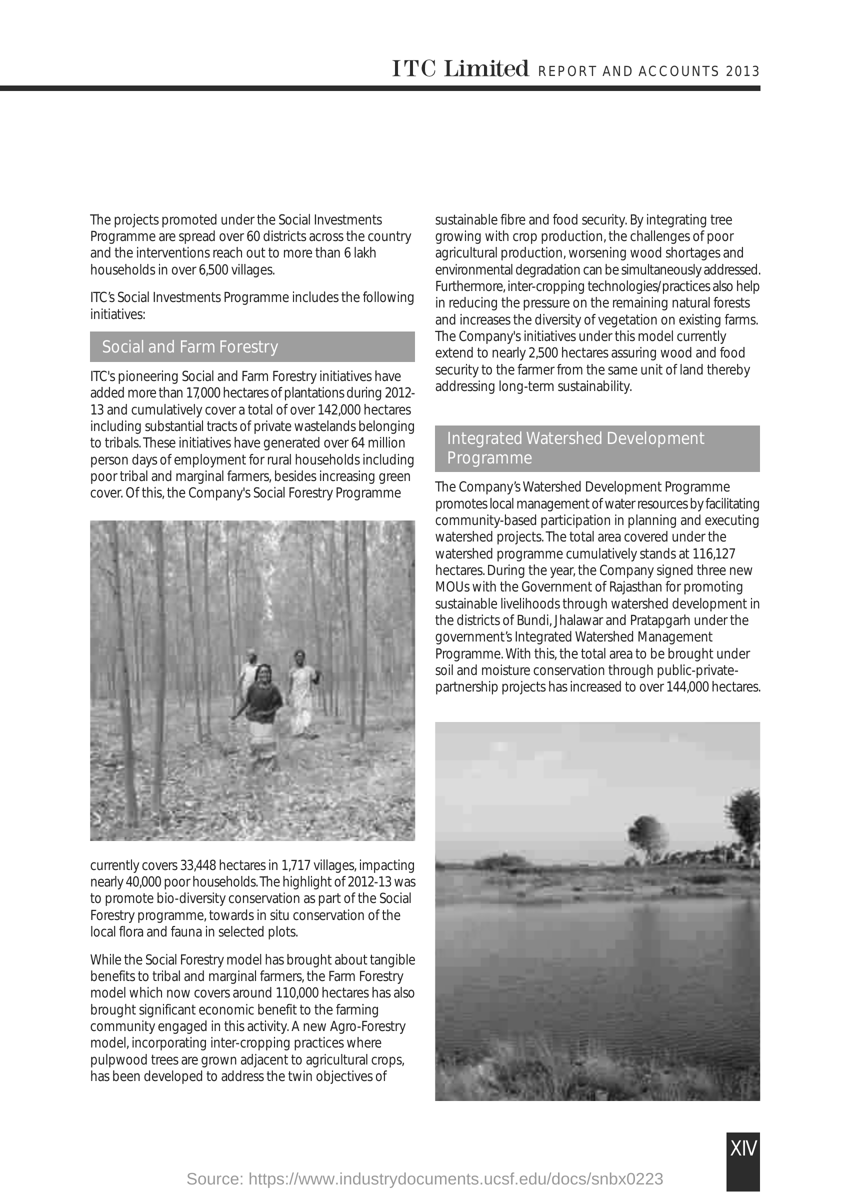

In [ ]:
image = Example['image_raw']
# let's make the image a bit smaller when visualizing
width, height = image.size
display(image.resize((int(width*0.5), int(height*0.5))))

In [ ]:
Ground_Truth = Example['ground_truth']
Ground_Truth

'{"gt_parses": [{"question" : "Mention \\"the total area covered under the watershed Programme\\"?", "answer" : "116,127 hectares"}]}'

In [ ]:
import json
GT = json.loads(Ground_Truth)

# Extract the question from the first item in gt_parses
question = GT['gt_parses'][0]['question']

print("Question:", question)

Question: Mention "the total area covered under the watershed Programme"?


In [ ]:
question = 'how many villages Company social forestory programme covers?'


In [ ]:
answer, score = get_answer(image, question, model, processor)
#score

<s_question> how many villages Company social forestory programme covers?</s_question><s_answer> 60</s_answer>


In [ ]:
answer, score

({'question': 'how many villages Company social forestory programme covers?',
  'answer': '60'},
 0.020754115656018257)

In [ ]:
filename = 'Stop and Shop Receipt Invoice.jpeg'
image = Image.open(image_folder/filename).convert('RGB')

NameError: name 'image_folder' is not defined

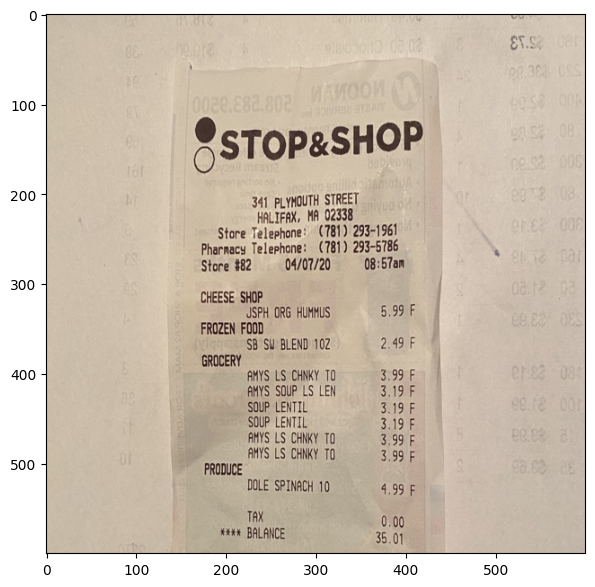

In [ ]:
show_image(image)


In [ ]:
question = "What is the total or balance?"
answer, score = get_answer(image_folder, filename, question, model, processor)

<s_question> What is the total or balance?</s_question><s_answer> 35.01</s_answer>


In [ ]:
question = "What is the date?"
answer, score = get_answer(image_folder, filename, question, model, processor)

<s_question> What is the date?</s_question><s_answer> 04/07/20</s_answer>


In [ ]:
print(answer)

{'question': 'What is the date?', 'answer': '3,19 F SUPPORTANTE'}


In [ ]:
print(score)

0.5572434663772583


# Evaluation on Test Dataset

In [ ]:
Test_dataset = dataset['test']

In [ ]:
from donut import JSONParseEvaluator

def compare_json(target, prediction):
# def compare_json(file_name, target, prediction):
  # print("Image : ",file_name)
  evaluator = JSONParseEvaluator()
  score = evaluator.cal_acc(prediction, target)
  print("Score",score)
  return score

In [ ]:
#for DocVQA

import json
import time
from distance import levenshtein

Test_TED = 0
total_norm_leven_sim = 0
total_inference_time = 0

for i in range(len(Test_dataset)):
    start_time = time.time()
    Sample = Test_dataset[i]
    GT = json.loads(Sample['ground_truth'])
    question = GT['gt_parses'][0]['question']
    target = GT['gt_parses'][0]['answer']
    image = Sample['image_raw']

    Prediction, score = get_answer(image, question, model, processor)
    Prediction = Prediction['answer']

    Prediction = Prediction.upper().replace(" ", "").rstrip(".")
    target = target.upper().replace(" ", "").rstrip(".")




    Sample_TED_Score = compare_json(target, Prediction)

    print(
            {
                "PREDICTION": Prediction,
                "TARGET": target,
                "SAMPLE TED": Sample_TED_Score
            }
        )

    Test_TED += Sample_TED_Score


    # Calculate Levenshtein similarity
    gt_text = json.dumps(target)
    pred_text = json.dumps(Prediction)
    len_gt = max(len(gt_text), 1)  # Ensure denominator is not zero
    norm_leven_sim = (len_gt - levenshtein(gt_text, pred_text)) / len_gt
    total_norm_leven_sim += norm_leven_sim

    end_time = time.time()
    inference_time = end_time - start_time
    total_inference_time += inference_time

TED_Score_TestDataset = Test_TED / len(Test_dataset)
average_norm_leven_sim = total_norm_leven_sim / len(Test_dataset)

print("Average TED on Test Dataset:", TED_Score_TestDataset)
print("Average Normalized Levenshtein Similarity:", average_norm_leven_sim)
print("Total Inference Time:", total_inference_time, "seconds")


NameError: name 'Test_dataset' is not defined

In [ ]:
Test_dataset = dataset['test']
len(Test_dataset)

440

In [ ]:
print(Test_dataset[0])

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=4368x2565 at 0x2845090FE50>, 'text': {'answer': '★★', 'question': 'What is the rating of Communication of Schedule Changes?'}}


In [ ]:
import json
import time
from distance import levenshtein

Test_TED = 0
total_norm_leven_sim = 0
total_inference_time = 0
missing_answer_count = 0  # Counter for missing 'answer' key

for i in range(len(Test_dataset)):
    start_time = time.time()
    Sample = Test_dataset[i]

    question = Sample['text']['question']
    target = Sample['text']['answer']
    image = Sample['image']

    Prediction, score = get_answer(image, question, model, processor)
    print(Prediction)

    # Check if 'answer' key exists in Prediction
    if 'answer' not in Prediction:
        missing_answer_count += 1
        print(f"Missing 'answer' key in prediction for sample {i}.")
        continue

    Prediction = Prediction['answer']

    Prediction = Prediction.upper().replace(" ", "").rstrip(".")
    target = target.upper().replace(" ", "").rstrip(".")

    Sample_TED_Score = compare_json(target, Prediction)

    print(
        {
            "PREDICTION": Prediction,
            "TARGET": target,
            "SAMPLE TED": Sample_TED_Score
        }
    )

    Test_TED += Sample_TED_Score

    # Calculate Levenshtein similarity
    gt_text = json.dumps(target)
    pred_text = json.dumps(Prediction)
    len_gt = max(len(gt_text), 1)  # Ensure denominator is not zero
    norm_leven_sim = (len_gt - levenshtein(gt_text, pred_text)) / len_gt
    total_norm_leven_sim += norm_leven_sim

    end_time = time.time()
    inference_time = end_time - start_time
    total_inference_time += inference_time

TED_Score_TestDataset = Test_TED / (len(Test_dataset) - missing_answer_count) if len(Test_dataset) - missing_answer_count > 0 else 0
average_norm_leven_sim = total_norm_leven_sim / (len(Test_dataset) - missing_answer_count) if len(Test_dataset) - missing_answer_count > 0 else 0

print("Average TED on Test Dataset:", TED_Score_TestDataset)
print("Average Normalized Levenshtein Similarity:", average_norm_leven_sim)
print("Total Inference Time:", total_inference_time, "seconds")
print("Number of samples with missing 'answer':", missing_answer_count)


{'answer': '★'}
Score 0.5
{'PREDICTION': '★', 'TARGET': '★★', 'SAMPLE TED': 0.5}
{'answer': 'Communication of Schedule Changes, Driver professionalism, Accessibility for Disabled Passengers, Safety measures'}
Score 0.3666666666666667
{'PREDICTION': 'COMMUNICATIONOFSCHEDULECHANGES,DRIVERPROFESSIONALISM,ACCESSIBILITYFORDISABLEDPASSENGERS,SAFETYMEASURES', 'TARGET': 'COSTOFFARE,AIRCONDITIONING,PUNCTUALITY,ACCESSIBILITYFORDISABLEDPASSENGERS,CLEANLINESS,CUSTOMERSERVICE,FREQUENCYOFSERVICE', 'SAMPLE TED': 0.3666666666666667}
{'answer': 'Communication of Schedule Changes, Handling of Complaints and Feedback, Accessibility for Disabled Passengers, Safety measures'}
Score 0
{'PREDICTION': 'COMMUNICATIONOFSCHEDULECHANGES,HANDLINGOFCOMPLAINTSANDFEEDBACK,ACCESSIBILITYFORDISABLEDPASSENGERS,SAFETYMEASURES', 'TARGET': 'BUSINTERIORMAINTENANCE,TICKETINGPROCESS,AVAILABILITYOFLUGGAGESPACE', 'SAMPLE TED': 0}
{'answer': 'Cost of Fare, Communication of Schedule Changes, Driver professionalism, Accessibility f

In [ ]:
import json
import time
from distance import levenshtein

Test_TED = 0
total_norm_leven_sim = 0
total_inference_time = 0
missing_answer_count = 0  # Counter for missing 'answer' key

for i in range(len(Test_dataset)):
    start_time = time.time()
    Sample = Test_dataset[i]

    question = Sample['text']['question']
    target = Sample['text']['answer']
    image = Sample['image']

    Prediction, score = get_answer(image, question, model, processor)
    print(Prediction)

    # Check if 'answer' key exists in Prediction
    if 'answer' not in Prediction:
        missing_answer_count += 1
        print(f"Missing 'answer' key in prediction for sample {i}.")
        continue

    Prediction = Prediction['answer']

    Prediction = Prediction.upper().replace(" ", "").rstrip(".")
    target = target.upper().replace(" ", "").rstrip(".")

    Sample_TED_Score = compare_json(target, Prediction)

    print(
        {
            "PREDICTION": Prediction,
            "TARGET": target,
            "SAMPLE TED": Sample_TED_Score
        }
    )

    Test_TED += Sample_TED_Score

    # Calculate Levenshtein similarity
    gt_text = json.dumps(target)
    pred_text = json.dumps(Prediction)
    len_gt = max(len(gt_text), 1)  # Ensure denominator is not zero
    norm_leven_sim = (len_gt - levenshtein(gt_text, pred_text)) / len_gt
    total_norm_leven_sim += norm_leven_sim

    end_time = time.time()
    inference_time = end_time - start_time
    total_inference_time += inference_time

TED_Score_TestDataset = Test_TED / (len(Test_dataset) - missing_answer_count) if len(Test_dataset) - missing_answer_count > 0 else 0
average_norm_leven_sim = total_norm_leven_sim / (len(Test_dataset) - missing_answer_count) if len(Test_dataset) - missing_answer_count > 0 else 0

print("Average TED on Test Dataset:", TED_Score_TestDataset)
print("Average Normalized Levenshtein Similarity:", average_norm_leven_sim)
print("Total Inference Time:", total_inference_time, "seconds")
print("Number of samples with missing 'answer':", missing_answer_count)


{'answer': '★★'}
Score 1.0
{'PREDICTION': '★★', 'TARGET': '★★', 'SAMPLE TED': 1.0}
{'answer': 'Ease of Boarding and Alighting'}
Score 0.14166666666666672
{'PREDICTION': 'EASEOFBOARDINGANDALIGHTING', 'TARGET': 'COSTOFFARE,AIRCONDITIONING,PUNCTUALITY,ACCESSIBILITYFORDISABLEDPASSENGERS,CLEANLINESS,CUSTOMERSERVICE,FREQUENCYOFSERVICE', 'SAMPLE TED': 0.14166666666666672}
{'answer': 'Ease of Boarding and Alighting'}
Score 0.18181818181818177
{'PREDICTION': 'EASEOFBOARDINGANDALIGHTING', 'TARGET': 'BUSINTERIORMAINTENANCE,TICKETINGPROCESS,AVAILABILITYOFLUGGAGESPACE', 'SAMPLE TED': 0.18181818181818177}
{'answer': 'Ease of Boarding and Alighting'}
Score 0.38235294117647056
{'PREDICTION': 'EASEOFBOARDINGANDALIGHTING', 'TARGET': 'SAFETYMEASURES,AVAILABILITYOFPOWEROUTLETS,EASEOFBOARDINGANDALIGHTING', 'SAMPLE TED': 0.38235294117647056}
{'answer': '★'}
Score 1.0
{'PREDICTION': '★', 'TARGET': '★', 'SAMPLE TED': 1.0}
{'answer': '★'}
Score 1.0
{'PREDICTION': '★', 'TARGET': '★', 'SAMPLE TED': 1.0}
{'answer

# Evaluation on Categories

In [ ]:
from datasets import load_from_disk
category_dataset = load_from_disk(r'E:\Abdul_Muqtadir\Thesis\Dataset\Test_categories')
category_dataset

In [ ]:

import json
import time
from distance import levenshtein

Test_TED = 0
total_norm_leven_sim = 0
total_inference_time = 0
total_samples = 0  # To track total samples across splits

# Iterate over each split
for split in category_dataset:
    print(f"Processing split: {split}")
    print("------------------------------------------------------------")
    print("------------------------------------------------------------")
    print("------------------------------------------------------------")
    data = category_dataset[split]

    split_TED = 0  # For tracking TED within a split
    split_norm_leven_sim = 0  # For tracking normalized Levenshtein within a split
    split_inference_time = 0  # To track time for each split

    for i in range(len(data)):
        print(f"Sample {i+1}/{len(data)} in split {split}")

        # Timing inference
        start_time = time.time()

        Sample = data[i]
        GT = json.loads(Sample['ground_truth'])
        question = GT['gt_parses'][0]['question']
        target = GT['gt_parses'][0]['answer']
        image = Sample['image_raw']

        Prediction, score = get_answer(image, question, model, processor)
        Prediction = Prediction['answer']

        # Clean up Prediction and target
        Prediction = Prediction.upper().replace(" ", "").rstrip(".")
        target = target.upper().replace(" ", "").rstrip(".")

        # Calculate TED score
        Sample_TED_Score = compare_json(target, Prediction)
        split_TED += Sample_TED_Score

        print({
            "PREDICTION": Prediction,
            "TARGET": target,
            "SAMPLE TED": Sample_TED_Score
        })

        # Calculate Levenshtein similarity
        gt_text = json.dumps(target)
        pred_text = json.dumps(Prediction)
        len_gt = max(len(gt_text), 1)  # Ensure denominator is not zero
        norm_leven_sim = (len_gt - levenshtein(gt_text, pred_text)) / len_gt
        split_norm_leven_sim += norm_leven_sim

        # End timing inference
        end_time = time.time()
        inference_time = end_time - start_time
        split_inference_time += inference_time

    # Average TED and Levenshtein similarity for the split
    TED_Score_TestDataset = split_TED / len(data)
    average_norm_leven_sim = split_norm_leven_sim / len(data)

    print(f"Average TED on Split {split}: {TED_Score_TestDataset}")
    print(f"Average Normalized Levenshtein Similarity for Split {split}: {average_norm_leven_sim}")
    print(f"Total Inference Time for Split {split}: {split_inference_time} seconds")

    # Aggregate results across all splits
    Test_TED += split_TED
    total_norm_leven_sim += split_norm_leven_sim
    total_inference_time += split_inference_time
    total_samples += len(data)

# Calculate overall metrics across all splits
if total_samples > 0:
    TED_Score_TestDataset = Test_TED / total_samples
    average_norm_leven_sim = total_norm_leven_sim / total_samples

    print("Overall Average TED on Test Dataset:", TED_Score_TestDataset)
    print("Overall Average Normalized Levenshtein Similarity:", average_norm_leven_sim)
    print("Overall Total Inference Time:", total_inference_time, "seconds")


Processing split: text
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
Sample 1/58 in split text
<s_question> What is the Grand Total for Gross Block(At Cost) As of 31.3.2011?</s_question><s_answer> 6263.13</s_answer>
Score 0.125
{'PREDICTION': '6263.13', 'TARGET': '49910.91', 'SAMPLE TED': 0.125}
Sample 2/58 in split text
<s_question> what is the percent reported a decrease in hip pain?</s_question><s_answer> 98.1%</s_answer>
Score 1.0
{'PREDICTION': '98.1%', 'TARGET': '98.1%', 'SAMPLE TED': 1.0}
Sample 3/58 in split text
<s_question> How many total number of cases per shipment are mentioned in the form?</s_question><s_answer> 8</s_answer>
Score 1.0
{'PREDICTION': '8', 'TARGET': '8', 'SAMPLE TED': 1.0}
Sample 4/58 in split text
<s_question> What is the chain corporate name?</s_question><s_answer> RaceTrac</s_answer>
Score 1.0
{'PREDICTION': 'RACETRAC',

KeyError: 'ground_truth'

# Noise testing to reduce layers

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

processor = DonutProcessor.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_Test")
model = VisionEncoderDecoderModel.from_pretrained("E:\Abdul_Muqtadir\Thesis\DONUT_Test")
model.to(device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
Encoder = model.encoder

In [ ]:
Encoder_Layers = Encoder.encoder.layers

In [ ]:
EL_0_b_0_A_Q_W = Encoder_Layers[0].blocks[0].attention.self.query.weight

In [ ]:
EL_0_b_0_A_Q_W.shape

torch.Size([128, 128])